In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

TODO: consolidate functions, could be less.

For all graphs : I want raw, fraction, & ratio. 

Note:

PLS=promoter

dELS=distal enhancer

pELS=proximal enhancer

(See project readme for more information.)

In [2]:
genome_regions=["is_in_PLS","is_in_dELS","is_in_pELS"]

In [3]:
data_base_path="/home/mcn26/varef/scripts/noon_data/3.count/"

## pleiotropy

In [4]:
# Load the data into a pandas DataFrame
cadd_pleio = pd.read_csv(glob.glob(data_base_path+"CADD_pleio/*.csv")[0])

/tmp/ipykernel_1859172/1883729809.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['CADD_category']], axis=1)


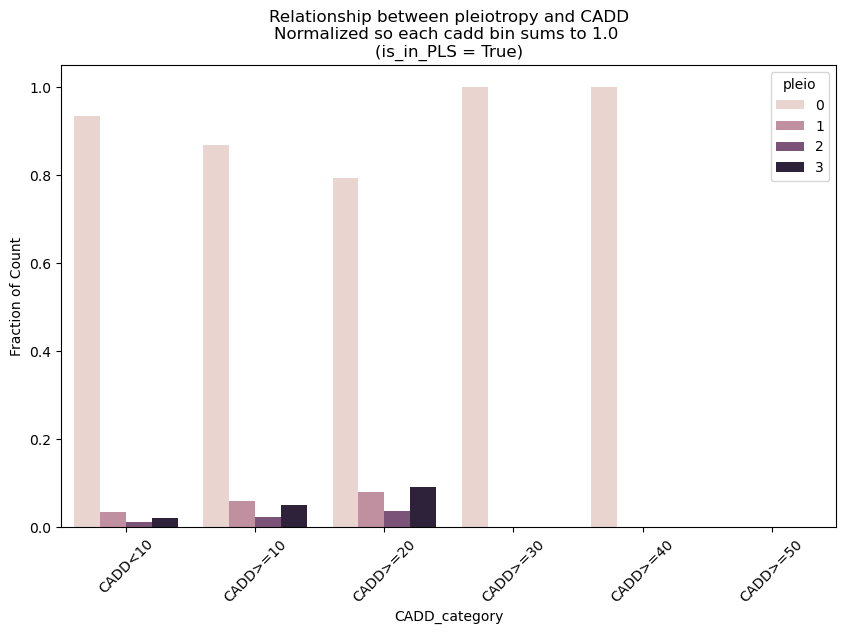

/tmp/ipykernel_1859172/1883729809.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['CADD_category']], axis=1)


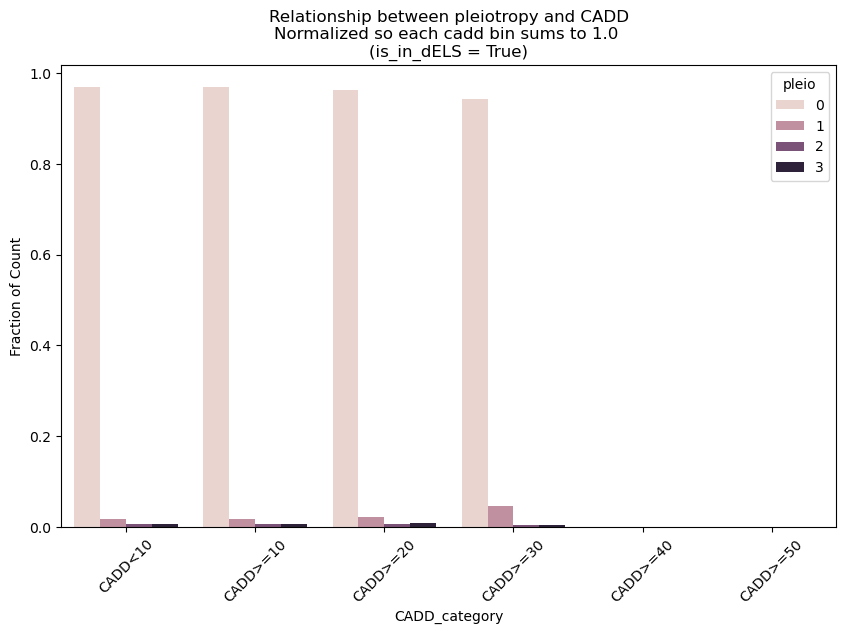

/tmp/ipykernel_1859172/1883729809.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['CADD_category']], axis=1)


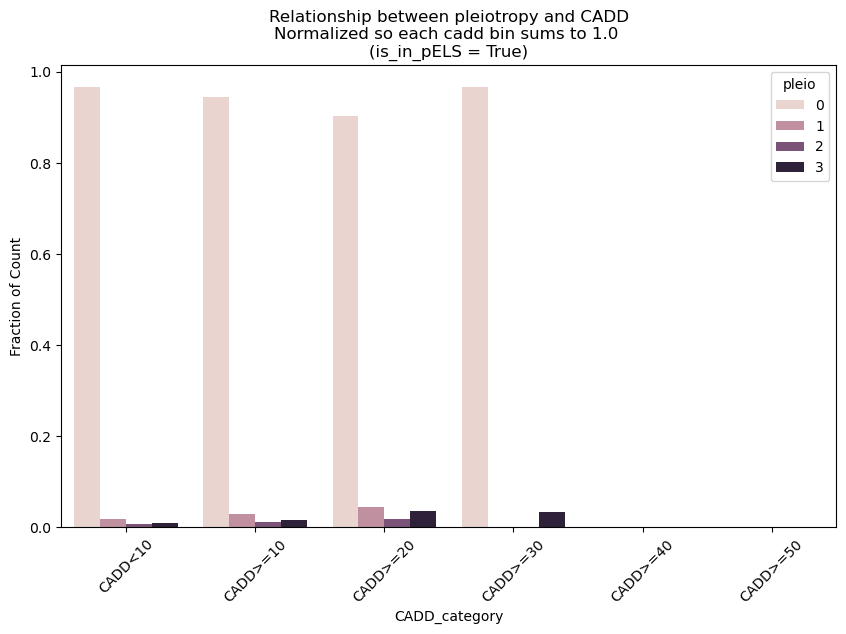

In [9]:
cadd_pleio

,pleio,CADD>=10,CADD>=20,CADD>=30,CADD>=40,CADD>=50,is_in_dELS,is_in_CA,is_in_pELS,is_in_CA-H3K4me3,is_in_CA-CTCF,is_in_PLS,is_in_TF,is_in_CA-TF,count,CADD_category
0,1,False,False,False,False,False,False,False,True,False,False,False,False,False,141427,CADD<10
1,0,False,False,False,False,False,False,False,False,True,False,False,False,False,3064991,CADD<10
2,2,True,True,False,False,False,False,False,False,False,False,True,False,False,1530,CADD>=20
3,2,False,False,False,False,False,False,False,False,False,False,True,False,False,13165,CADD<10
4,3,False,False,False,False,False,False,False,False,False,False,False,True,False,17567,CADD<10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,3,True,False,False,False,False,False,True,False,False,False,False,False,False,1658,CADD>=10
125,3,True,True,False,False,False,False,False,False,True,False,False,False,False,58,CADD>=20
126,3,True,True,False,False,False,False,False,False,False,False,False,True,False,4,CADD>=20
127,3,True,True,True,False,False,False,False,True,False,False,False,False,False,1,CADD>=30


## PhyloP VS rarity

In [10]:
# Load the data into a pandas DataFrame
path=glob.glob(data_base_path+"phylop_count_table/*.csv")[0]
df = pd.read_csv(path)

In [11]:


# Define a function to plot count per "category" conditioned on "phylop_significant"

rarity_order = ["SINGLETON", "ULTRARARE", "RARE", "LOW_FREQ", "COMMON"]

def plot_count_by_category(df, genomic_region,normalize):
    subset_df = df[df[genomic_region]]

    
    if normalize:

        # Calculate the total count for each phylop_significant category

        total_counts = subset_df.groupby('phylop_significant')['count'].sum()

        # Normalize the counts by the total counts
        subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['phylop_significant']], axis=1)
        value_col = 'normalized_count'
        ylabel = 'Fraction of Count'
    else:
        value_col = 'count'
        ylabel = 'Count'


    plt.figure(figsize=(10, 6))
    sns.barplot(x='category', y=value_col, hue='phylop_significant', data=subset_df,order=rarity_order)
    plt.title(f"{'Normalized ' if normalize else ''}Count per Category Conditioned on Phylop Significant\n({genomic_region} = True)")
    plt.xticks(rotation=45)
    if normalize:
        plt.ylim(0, 0.6)
    plt.ylabel(ylabel)
    plt.show()

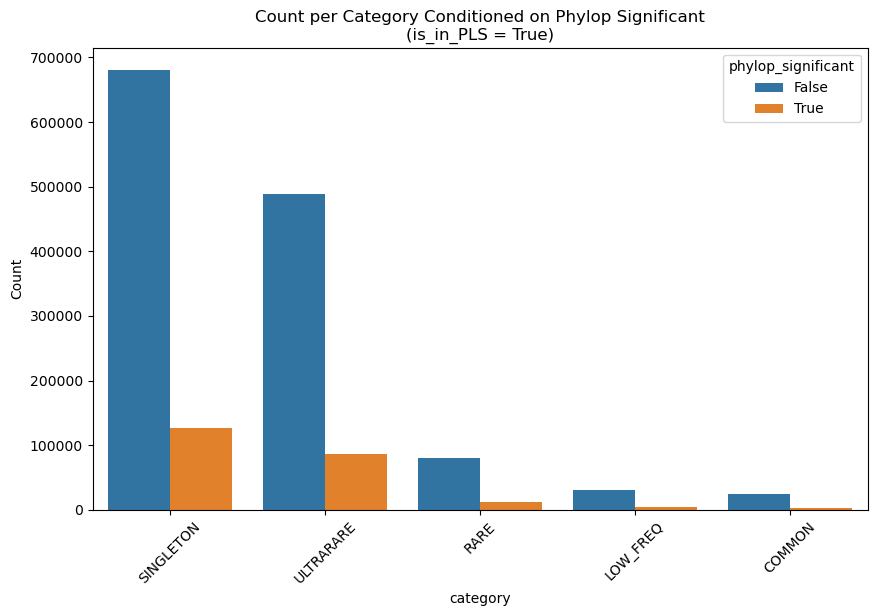

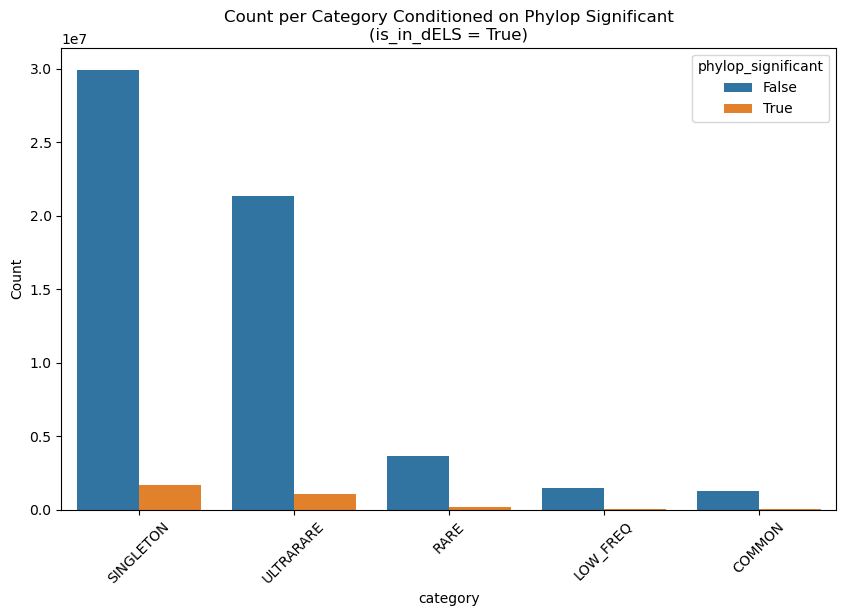

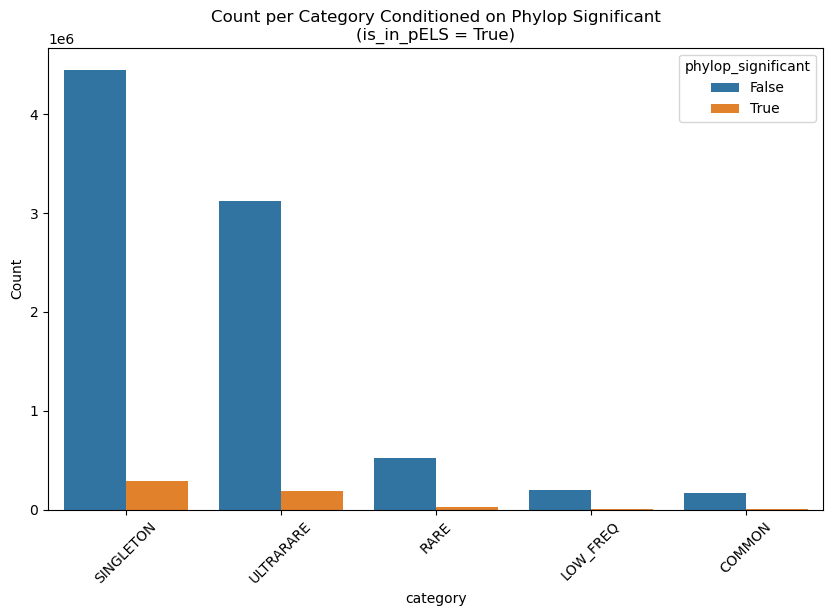

In [12]:
for var in genome_regions:
    plot_count_by_category(df, var,False)

/tmp/ipykernel_1859172/4144036898.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['phylop_significant']], axis=1)


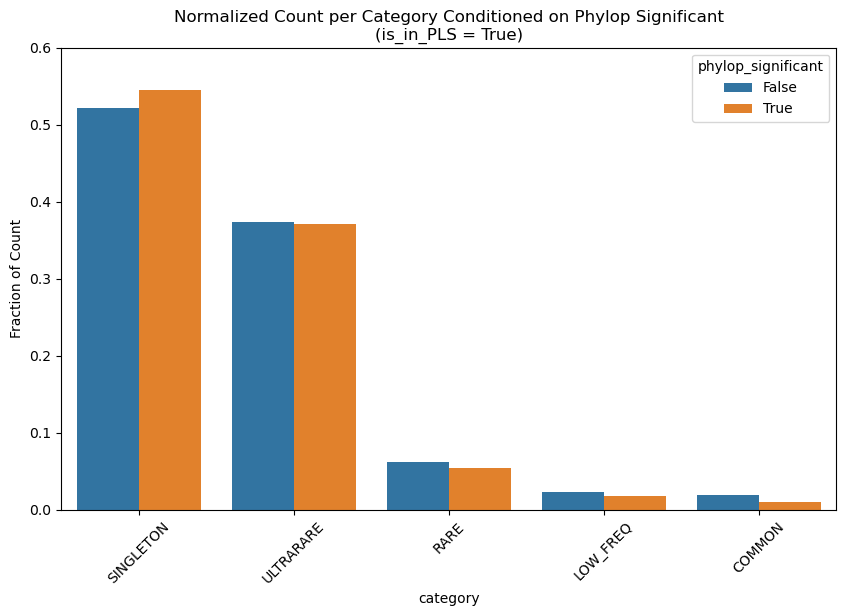

/tmp/ipykernel_1859172/4144036898.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['phylop_significant']], axis=1)


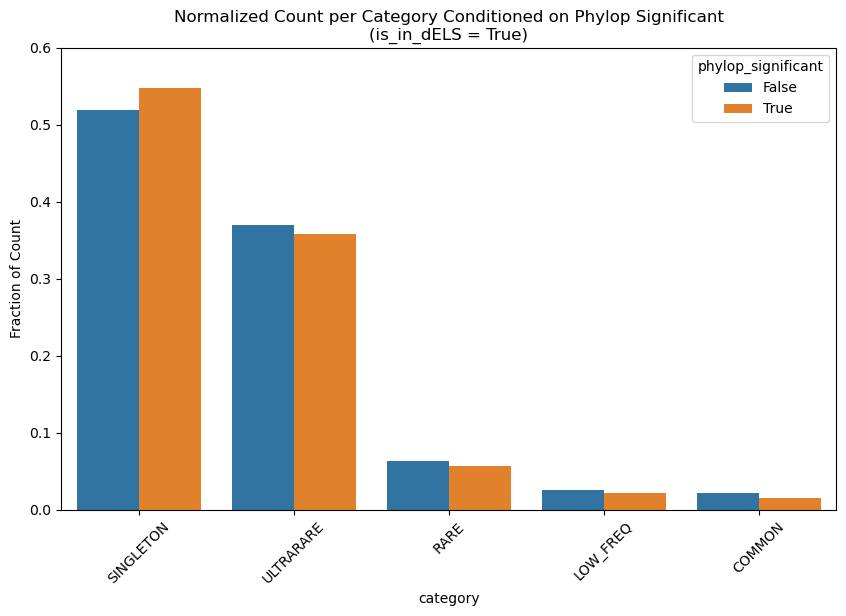

/tmp/ipykernel_1859172/4144036898.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['phylop_significant']], axis=1)


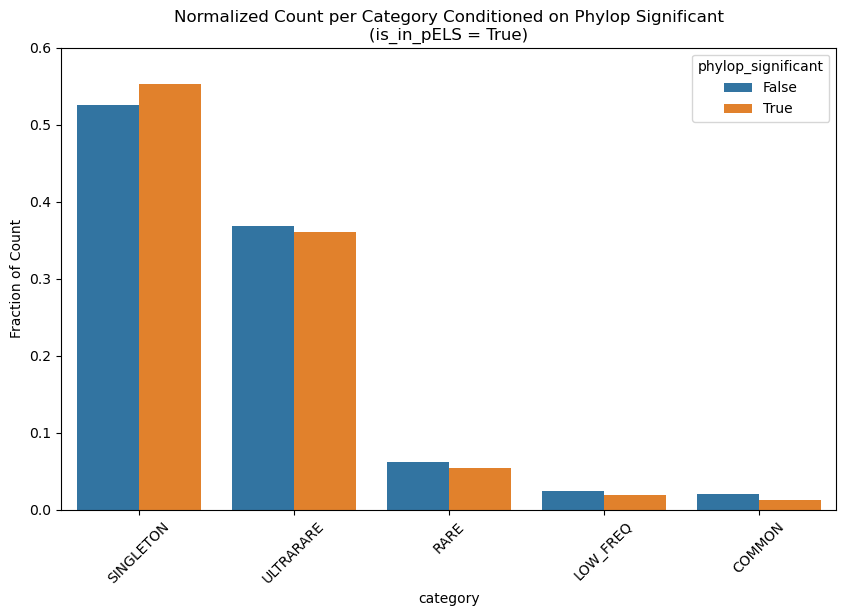

In [13]:
for var in genome_regions:
    plot_count_by_category(df, var,True)

In [14]:




def plot_fraction(df, genomic_region,to_plot):
    subset_df = df[df[genomic_region]]
    subset_df["rarity_bin"]=subset_df.apply(lump_rarity_categories,axis=1)
    subset_df=subset_df[subset_df["rarity_bin"]!="not_interesting"]
    total_counts = subset_df.groupby([to_plot,'rarity_bin'])['count'].sum().unstack()
    total_counts["ratio"]=total_counts["RARE"]/total_counts["COMMON"]
    plt.figure(figsize=(5, 5))
    sns.barplot(total_counts,y="ratio",x=to_plot)
    plt.xticks(rotation=45)
    plt.title(genomic_region)
    plt.show()
    

/tmp/ipykernel_1859172/928417429.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["rarity_bin"]=subset_df.apply(lump_rarity_categories,axis=1)


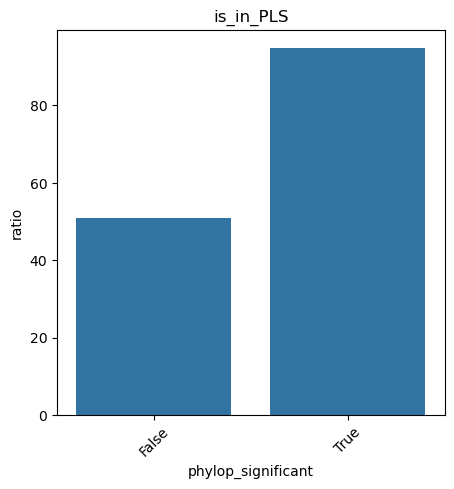

/tmp/ipykernel_1859172/928417429.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["rarity_bin"]=subset_df.apply(lump_rarity_categories,axis=1)


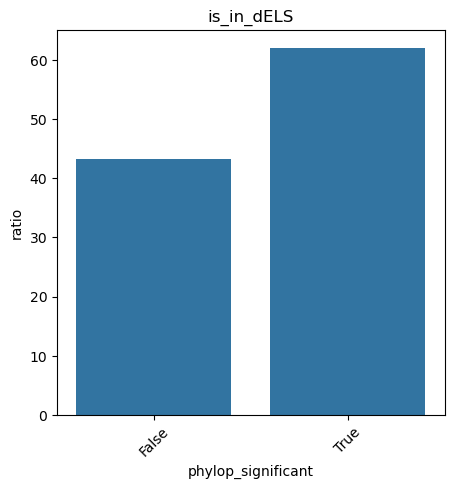

/tmp/ipykernel_1859172/928417429.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["rarity_bin"]=subset_df.apply(lump_rarity_categories,axis=1)


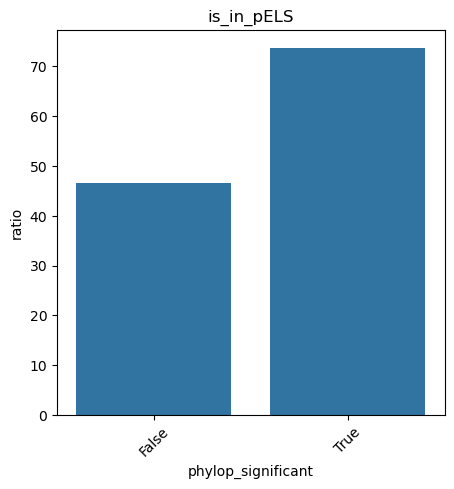

In [15]:
for var in genome_regions:
    plot_fraction(df, var,"phylop_significant")

## CADD vs rarity

load & munge data

In [16]:
#load
df_cadd = pd.read_csv(glob.glob(data_base_path+"CADD_count_table/*.csv")[0])


df_cadd['CADD_category'] = df_cadd.apply(find_true_column, columns=x_columns, default='CADD<10', axis=1)

Define & run function to plot cadd counts by genomic location type

In [17]:
def plot_cadd_count_by_category(df, genomic_region,normalize):
    subset_df = df[df[genomic_region]]

    graph_version="none"
    
    if normalize:

        # Calculate the total count for each phylop_significant category

        total_counts = subset_df.groupby('CADD_category')['count'].sum()

        # Normalize the counts by the total counts
        subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['CADD_category']], axis=1)

        
        value_col = 'normalized_count'
        ylabel = 'Fraction of Count'
        graph_version="Fraction : noramlized so each CADD threshold sums to 1"
    else:
        value_col = 'count'
        ylabel = 'Count'
        graph_version="Count"


    plt.figure(figsize=(10, 6))
    sns.barplot(x='CADD_category', y=value_col, hue='category', data=subset_df,order=["CADD<10"]+x_columns[::-1],hue_order=rarity_order)
    plt.title(f"{'Normalized ' if normalize else ''}{graph_version}\n({genomic_region} = True)")
    plt.xticks(rotation=45)
    plt.ylabel(ylabel)
    plt.show()

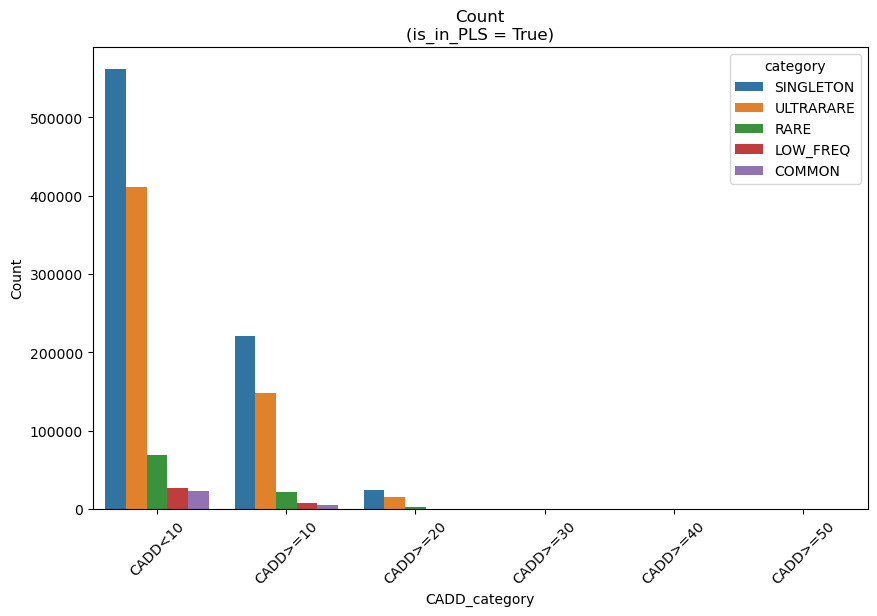

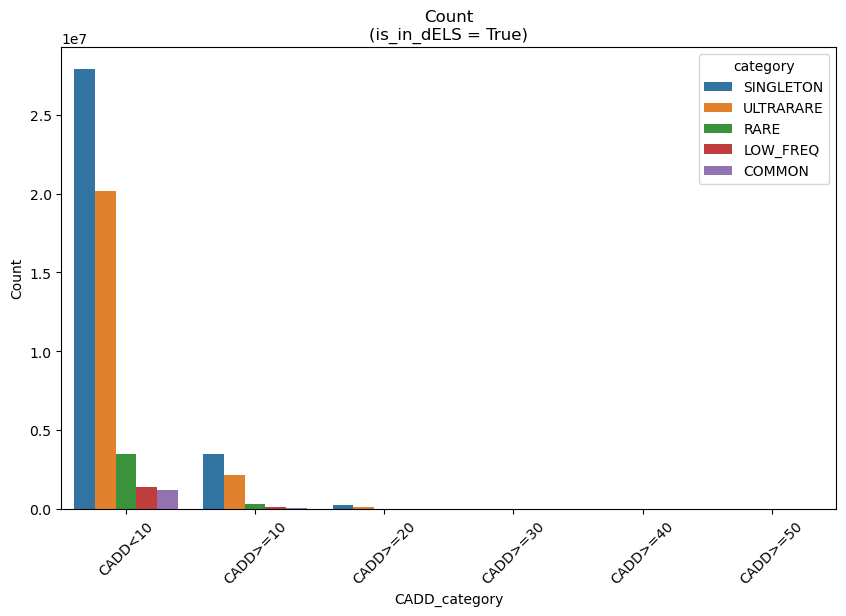

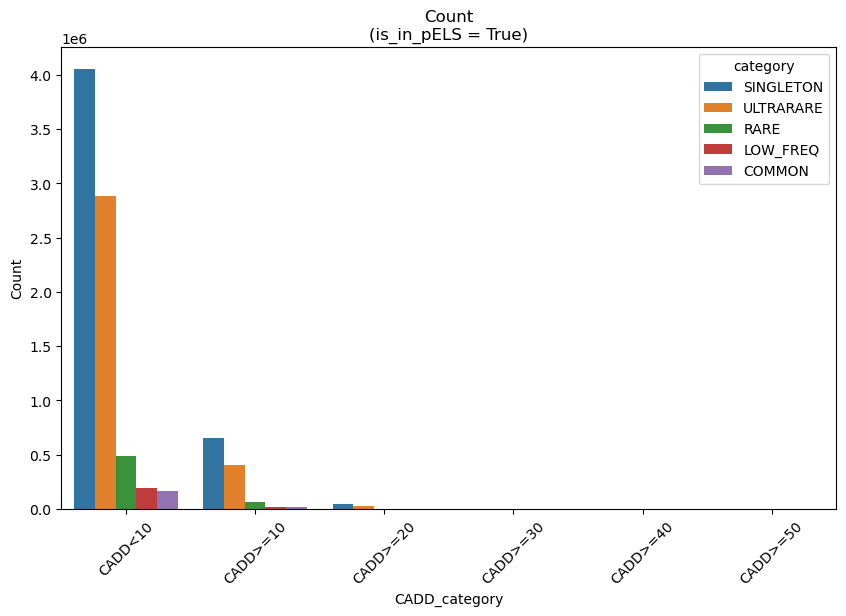

In [18]:
for var in genome_regions:
    plot_cadd_count_by_category(df_cadd, var,False)

/tmp/ipykernel_1859172/2789547196.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['CADD_category']], axis=1)


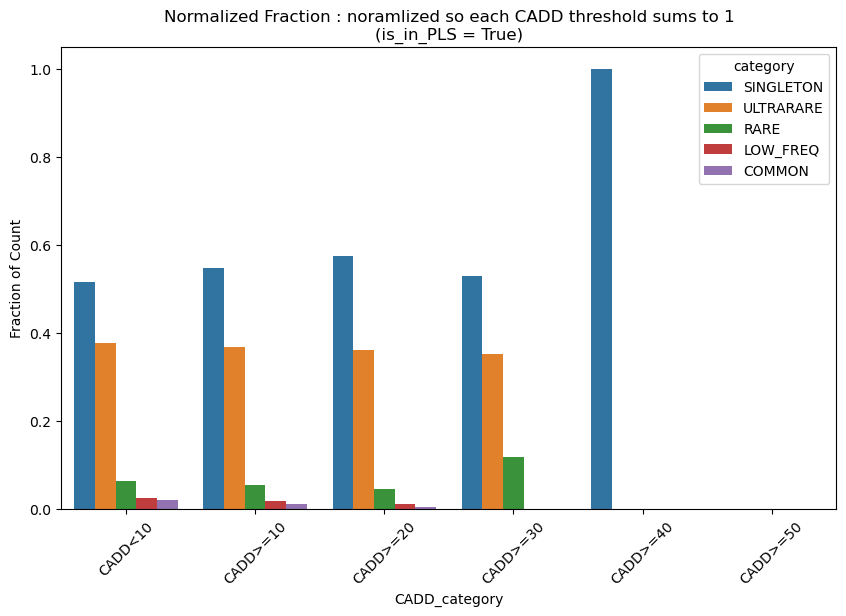

/tmp/ipykernel_1859172/2789547196.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['CADD_category']], axis=1)


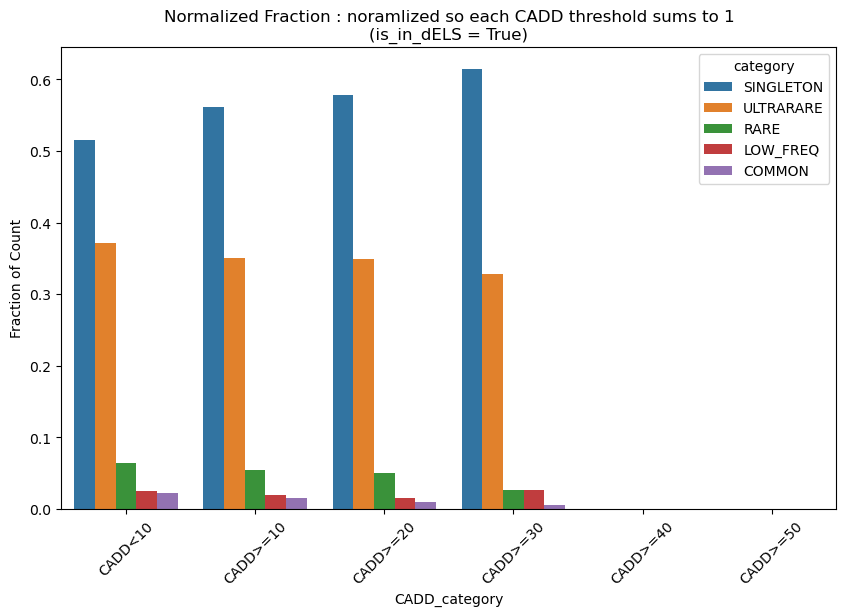

/tmp/ipykernel_1859172/2789547196.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['CADD_category']], axis=1)


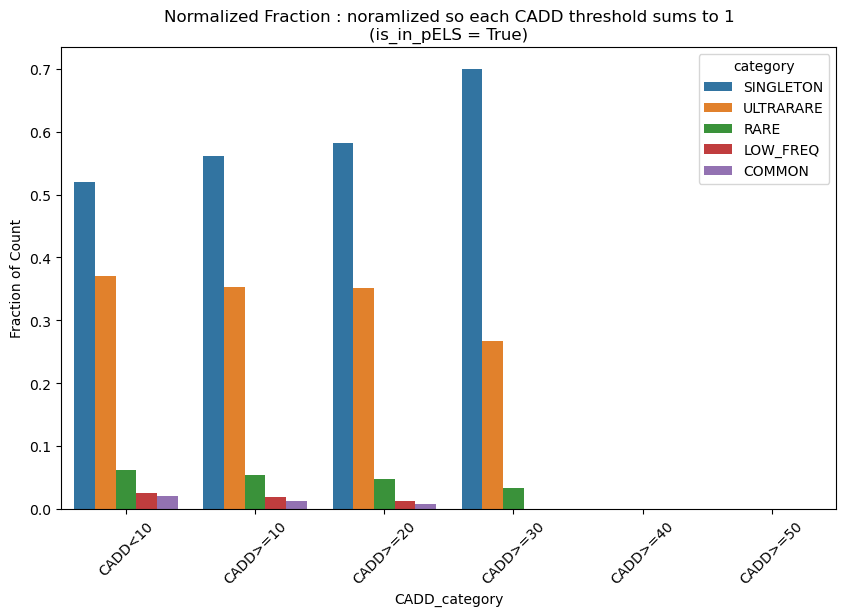

In [19]:
for var in genome_regions:
    plot_cadd_count_by_category(df_cadd, var,True)

Compute ratio rare over common. 

/tmp/ipykernel_1859172/928417429.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["rarity_bin"]=subset_df.apply(lump_rarity_categories,axis=1)


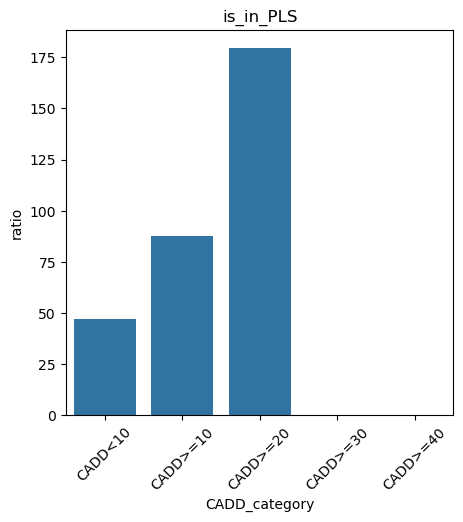

/tmp/ipykernel_1859172/928417429.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["rarity_bin"]=subset_df.apply(lump_rarity_categories,axis=1)


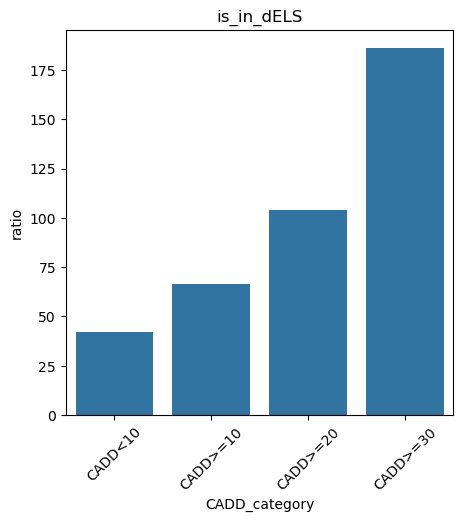

/tmp/ipykernel_1859172/928417429.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["rarity_bin"]=subset_df.apply(lump_rarity_categories,axis=1)


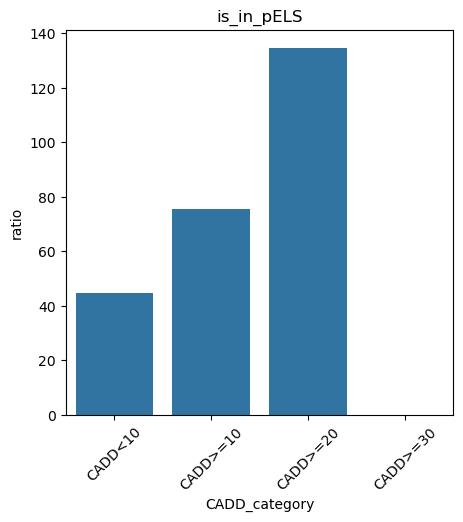

In [20]:
for var in genome_regions:
    plot_fraction(df_cadd,var,"CADD_category")

## Malinouis

In [21]:
df_mal = pd.read_csv(glob.glob(data_base_path+"malinouis_skew_and_thresh/*.csv")[0])

In [22]:

skew_columns=[]
ref_columns=[]
alt_columns=[]

for i in df_mal.columns:
    if "mean_skew" in i :
        skew_columns.append(i)
    elif "mean_ref" in i :
        ref_columns.append(i)
    elif "mean_alt" in i :
        alt_columns.append(i)

In [23]:
#fix the names
df_mal=df_mal.rename(columns={i:i.replace('^', ',').replace('&','.') for i in skew_columns+ref_columns+alt_columns})

In [24]:
skew_columns=[i.replace('^', ',').replace('&','.') for i in skew_columns]
ref_columns=[i.replace('^', ',').replace('&','.') for i in ref_columns]
alt_columns=[i.replace('^', ',').replace('&','.') for i in alt_columns]

In [25]:
df_mal['mean_skew'] = df_mal.apply(find_true_column, columns=skew_columns, default='Error', axis=1)
df_mal['mean_ref'] = df_mal.apply(find_true_column, columns=ref_columns, default='Error', axis=1)
df_mal["rarity_bin"]=df_mal.apply(lump_rarity_categories,axis=1)

In [26]:
def plot_2d(df, genomic_region,x,y,count_or_ratio):
    subset_df = df[df[genomic_region]]
    
    
    total_counts = subset_df.groupby([x,y,'rarity_bin'])['count'].sum().unstack()
    
    if count_or_ratio=="ratio":
        subset_df=subset_df[subset_df["rarity_bin"]!="not_interesting"]
        total_counts["ratio"]=total_counts["RARE"]/total_counts["COMMON"]
    elif count_or_ratio=="count":
        
        total_counts["count"]=total_counts[['COMMON','RARE','not_interesting']].sum(axis=1)
        
    
    
    plt.figure(figsize=(10, 10))
    
    pivot_table = total_counts.pivot_table(index='mean_skew', columns='mean_ref', values=count_or_ratio)#, aggfunc='mean'
    
    pivot_table = pivot_table.reindex(skew_columns[::-1], axis=0)
    pivot_table = pivot_table.reindex(ref_columns, axis=1)
    
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
    plt.title(f"{count_or_ratio}_{genomic_region}")
    plt.show()
    

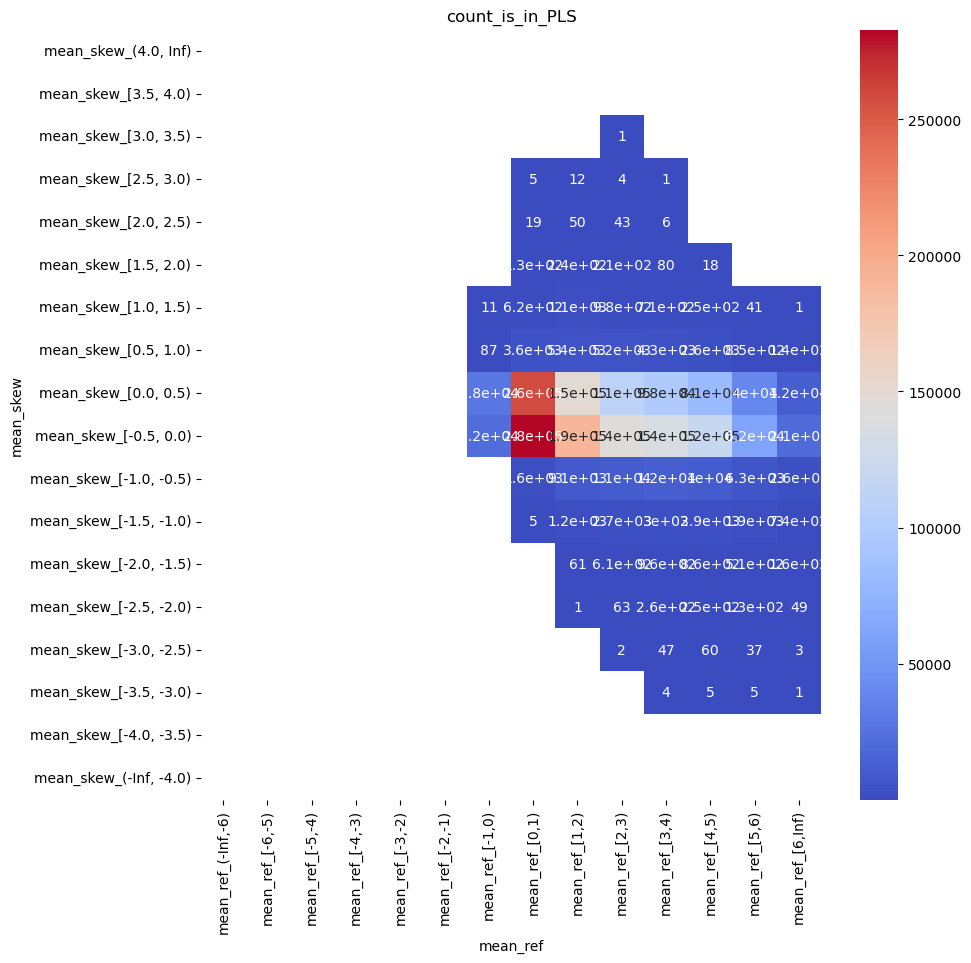

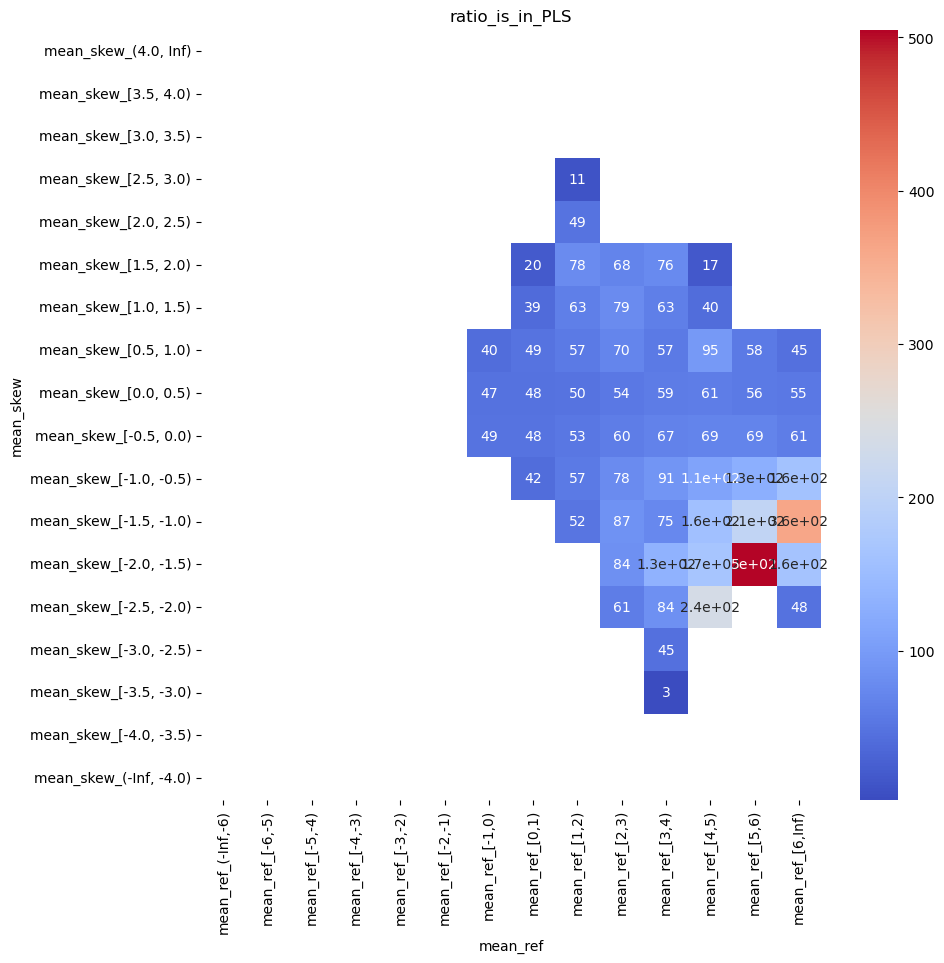

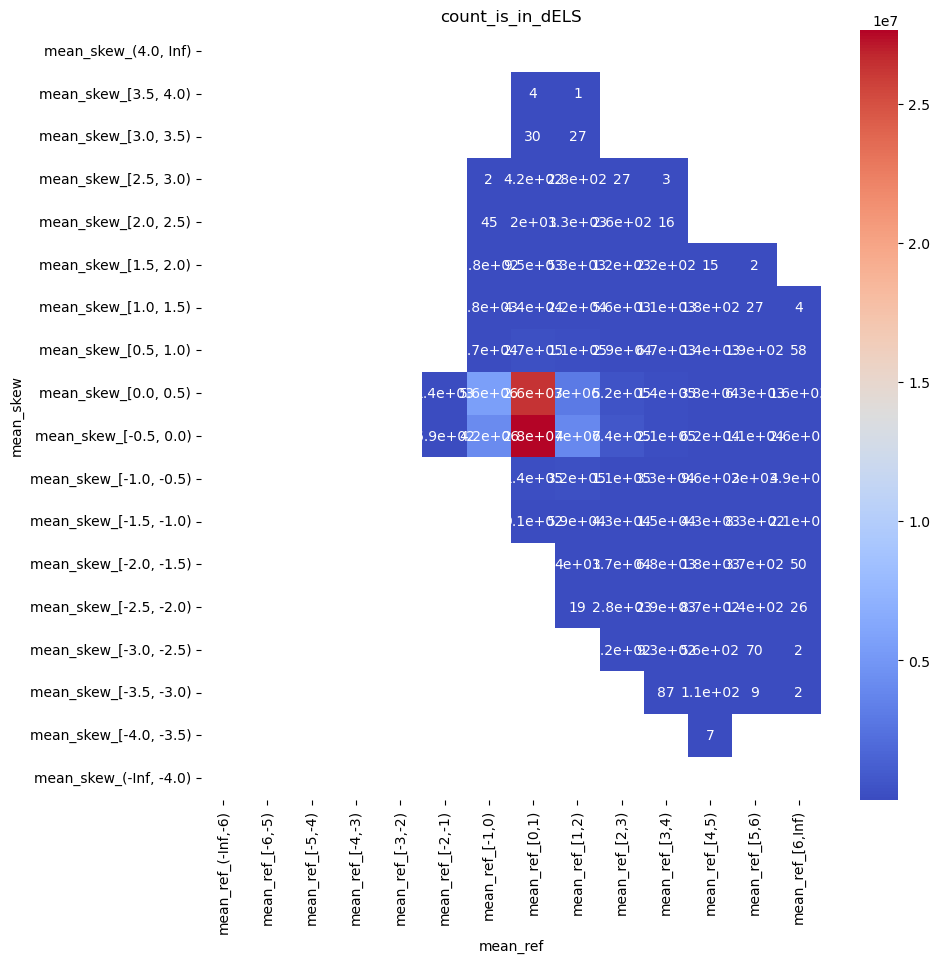

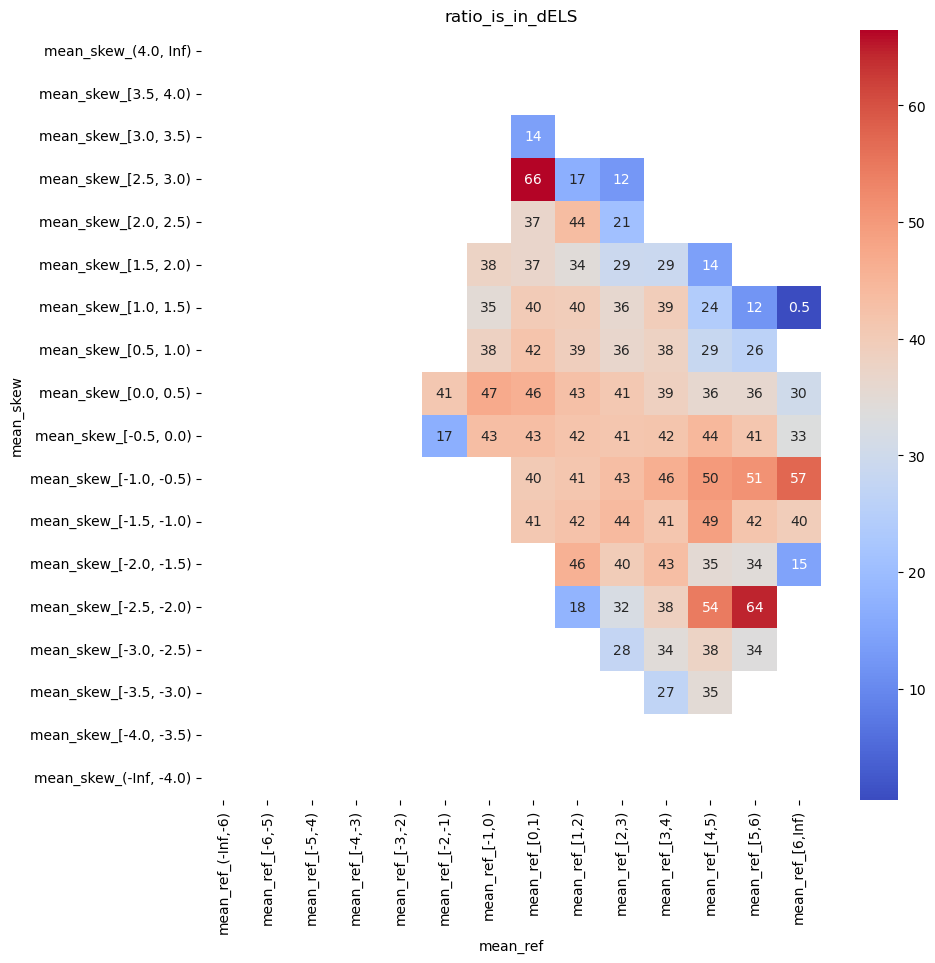

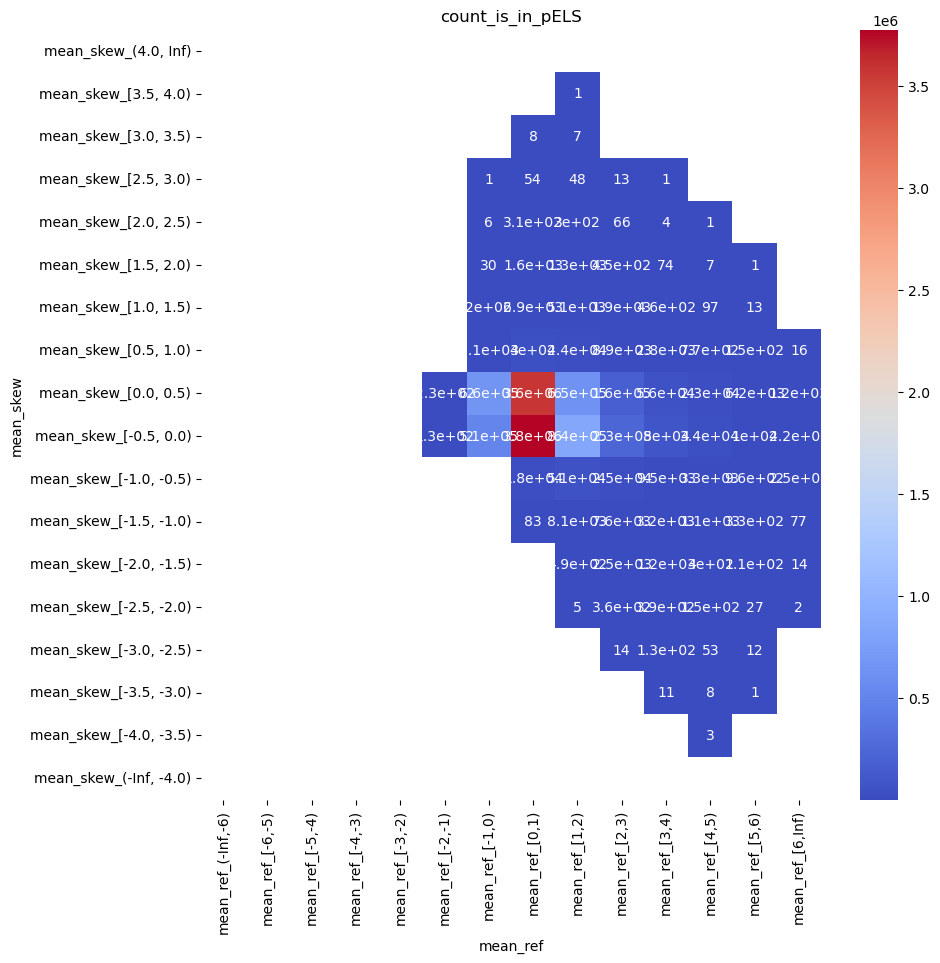

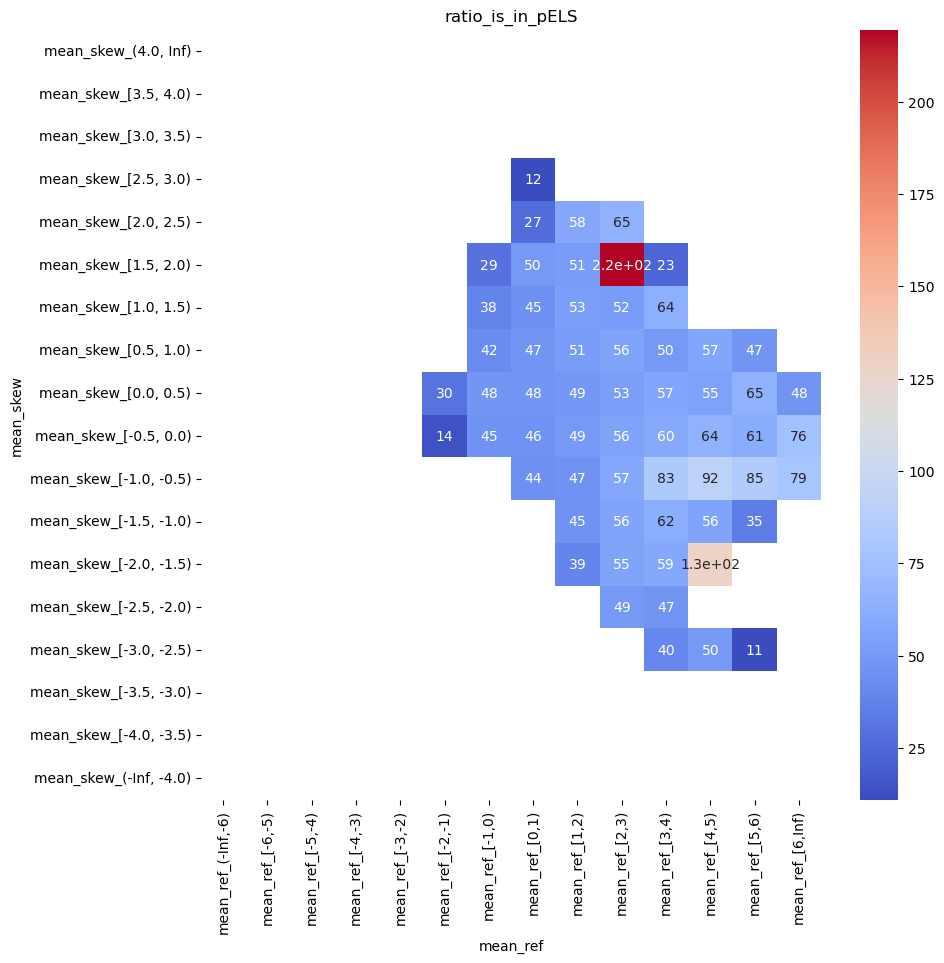

In [27]:
for var in genome_regions:
    plot_2d(df=df_mal,genomic_region=var,x="mean_skew",y="mean_ref",count_or_ratio="count")
    plot_2d(df=df_mal,genomic_region=var,x="mean_skew",y="mean_ref",count_or_ratio="ratio")


In [47]:
import pickle
#load order from disc
picklebase="/home/mcn26/varef/scripts/noon_scripts/3.count/"

mean_ref_thresh=None

with open(picklebase+"mean_ref_cutoffs.pkl", 'rb') as file:
    mean_ref_thresh = pickle.load(file)

mean_skew_thresh=None
with open(picklebase+"skew_cutoffs.pkl", 'rb') as file:
    mean_skew_thresh = pickle.load(file)

In [48]:
mean_skew_thresh

['mean_skew_(-Inf, -4.0)',
 'mean_skew_[-4.0, -3.5)',
 'mean_skew_[-3.5, -3.0)',
 'mean_skew_[-3.0, -2.5)',
 'mean_skew_[-2.5, -2.0)',
 'mean_skew_[-2.0, -1.5)',
 'mean_skew_[-1.5, -1.0)',
 'mean_skew_[-1.0, -0.5)',
 'mean_skew_[-0.5, 0.0)',
 'mean_skew_[0.0, 0.5)',
 'mean_skew_[0.5, 1.0)',
 'mean_skew_[1.0, 1.5)',
 'mean_skew_[1.5, 2.0)',
 'mean_skew_[2.0, 2.5)',
 'mean_skew_[2.5, 3.0)',
 'mean_skew_[3.0, 3.5)',
 'mean_skew_[3.5, 4.0)',
 'mean_skew_(4.0, Inf)']

In [51]:
def plot_2d_on_1d(df, genomic_region,x,y):
    subset_df = df[df[genomic_region]]
    
    subset_df=subset_df[subset_df["rarity_bin"]!="not_interesting"]
    
    
    total_counts = subset_df.groupby([x,y,'rarity_bin'])['count'].sum().unstack()
    
    
    
    total_counts["ratio"]=total_counts["RARE"]/total_counts["COMMON"]
     
    
    #total_counts=total_counts[total_counts[["COMMON","RARE"]].sum(axis=1)>10]
    
    
    #values_to_match=["mean_ref_[]"]
    #values_to_match=["0<mean_ref<=2","2<mean_ref<=4","4<mean_ref<=6"]
    #total_counts = total_counts.loc[total_counts.index.get_level_values('mean_ref').isin(values_to_match)]
    
    #hue_order=['mean_skew<=-0-8','-0-8<mean_skew<=-0-6000000000000001','-0-6000000000000001<mean_skew<=-0-4','-0-4<mean_skew<=-0-2','-0-2<mean_skew<=0-0','0-0<mean_skew<=0-2','0-2<mean_skew<=0-4','0-4<mean_skew<=0-6000000000000001','mean_skew>0-6000000000000001']
    
    plt.figure(figsize=(15, 8))
    
    plt.xticks(rotation=45, ha='right')

    sns.barplot(total_counts, x="mean_ref",hue="mean_skew",y="ratio",order=mean_ref_thresh,hue_order=mean_skew_thresh)
    plt.title(genomic_region)
    plt.show()

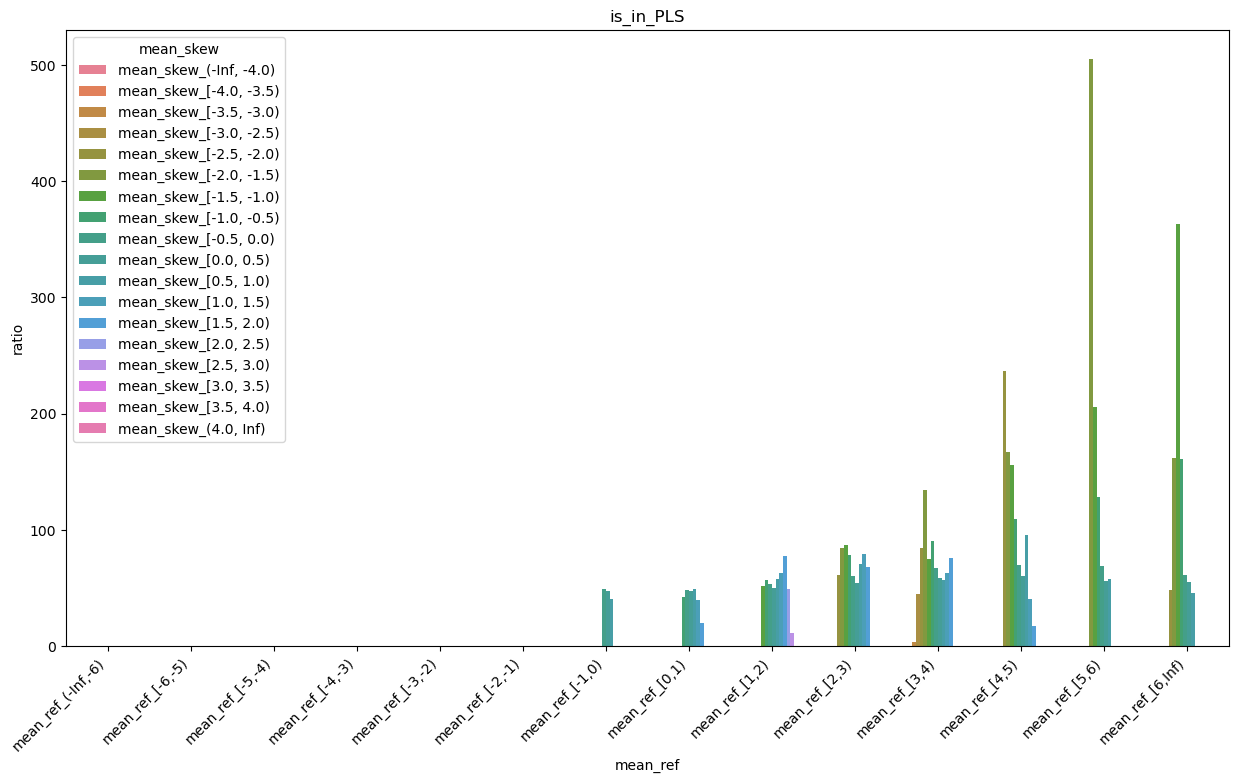

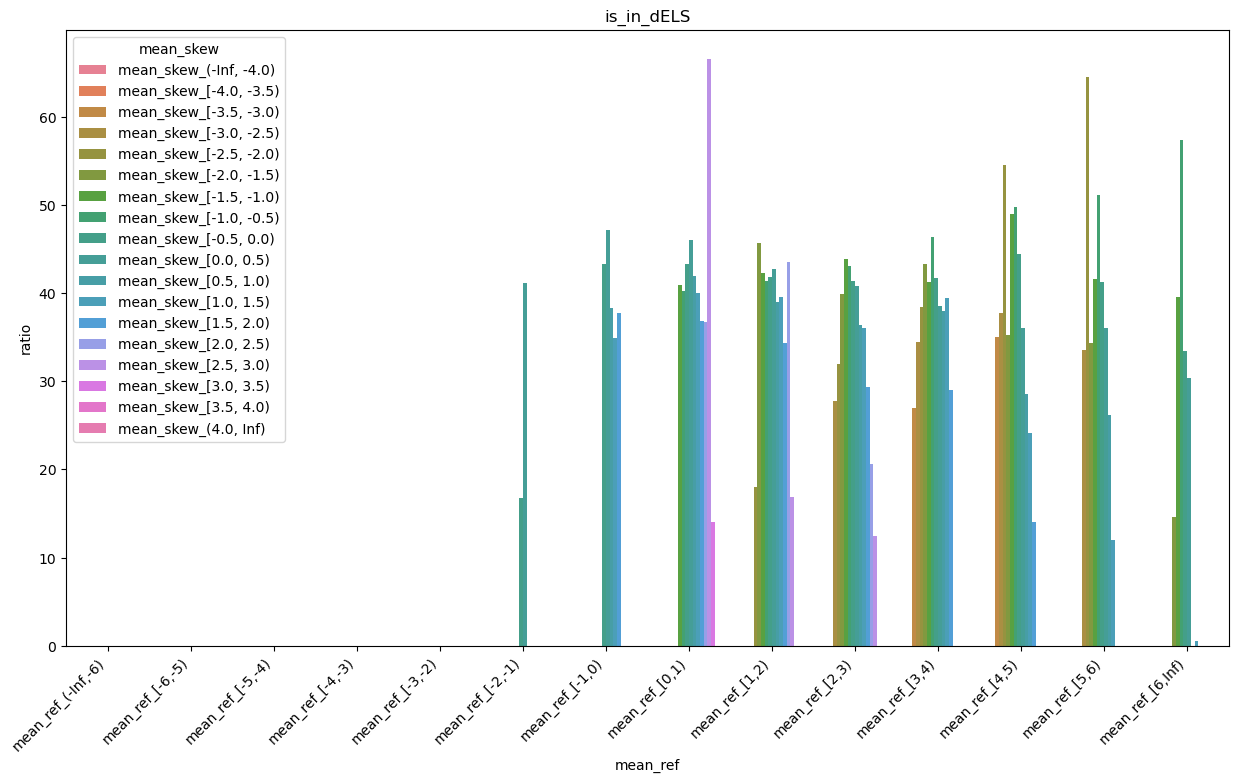

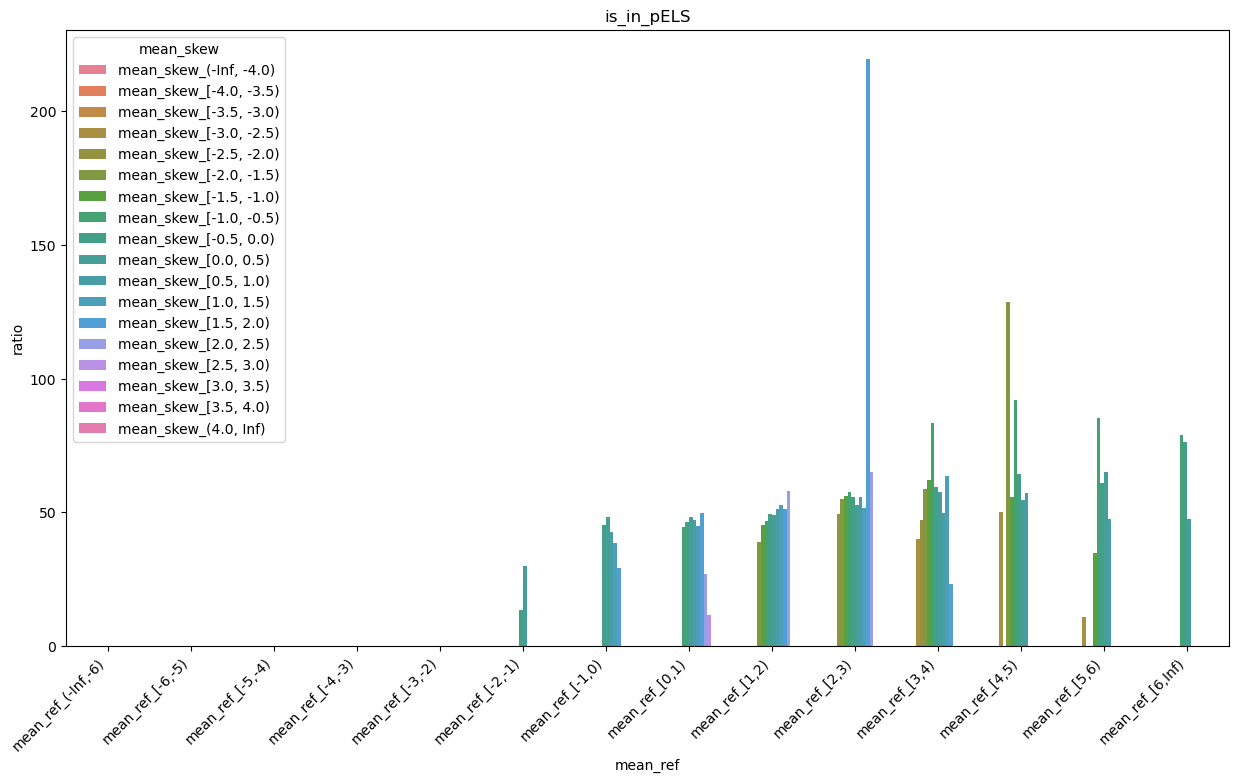

In [52]:
for var in genome_regions:
    plot_2d_on_1d(df=df_mal,genomic_region=var,x="mean_skew",y="mean_ref")